In [1]:
import tensorflow as tf

C:\Users\nitro\AppData\Local\Continuum\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nitro\AppData\Local\Continuum\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nitro\AppData\Local\Continuum\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C

In [2]:
# getting the dataset
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
# reading the datasets
mnist_df = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
type(mnist_df)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
mnist_df.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
mnist_df.train.num_examples

55000

In [8]:
mnist_df.test.num_examples

10000

In [10]:
mnist_df.validation.num_examples

5000

In [11]:
# visulaizing the data
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
mnist_df.train.images[1].shape

(784,)

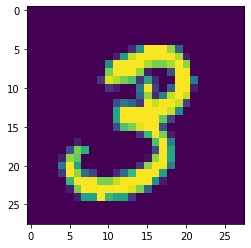

In [14]:
plt.imshow(mnist_df.train.images[1].reshape(28,28))

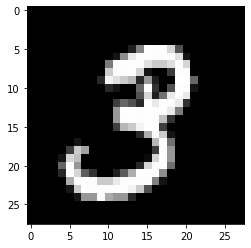

In [15]:
plt.imshow(mnist_df.train.images[1].reshape(28,28), cmap='gist_gray')

In [17]:
mnist_df.train.images[1].max()

1.0

In [18]:
mnist_df.train.images[1].min()

0.0

In [19]:
# creating the model
# placeholder
x = tf.placeholder(tf.float32, shape=[None, 784])

In [20]:
# creating the variable
W = tf.Variable(tf.zeros([784, 10]))

In [21]:
# creating the bias
b = tf.Variable(tf.zeros([10]))

In [22]:
# creating the graph
y = tf.matmul(x,W) + b

In [23]:
# creating a loss and optimizer function
y_true = tf.placeholder(tf.float32, shape=[None, 10])

In [24]:
## cross entropy function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [25]:
# creating a optimizer function
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [27]:
train = optimizer.minimize(cross_entropy)

In [28]:
# finally creating the session
init = tf.global_variables_initializer()

In [39]:
with tf.Session() as sess:
    sess.run(init)
    
    for each_step in range(1000):
        train_x, train_y = mnist_df.train.next_batch(100)
        sess.run(train, feed_dict={x:train_x, y_true:train_y})
    
    # testing the trained model
    crct_predictions = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    accuracy = tf.reduce_mean(tf.cast(crct_predictions, tf.float32))
    print(sess.run(accuracy, feed_dict={x: mnist_df.test.images, y_true:mnist_df.test.labels}))

0.9172


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])